CS4001/4042 Assignment 1, Part B, Q1
---

Real world datasets often have a mix of numeric and categorical features – this dataset is one example. To build models on such data, categorical features have to be encoded or embedded.

PyTorch Tabular is a library that makes it very convenient to build neural networks for tabular data. It is built on top of PyTorch Lightning, which abstracts away boilerplate model training code and makes it easy to integrate other tools, e.g. TensorBoard for experiment tracking.

For questions B1 and B2, the following features should be used:   
- **Numeric / Continuous** features: dist_to_nearest_stn, dist_to_dhoby, degree_centrality, eigenvector_centrality, remaining_lease_years, floor_area_sqm
- **Categorical** features: month, town, flat_model_type, storey_range



---



In [1]:
!pip install pytorch_tabular[extra]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.5/122.5 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 829.5/829.5 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 kB 31.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 72.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 70.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 544.6 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.0/190.0 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
SEED = 42

import os

import random
random.seed(SEED)

import numpy as np
np.random.seed(SEED)

import pandas as pd

from pytorch_tabular import TabularModel
from pytorch_tabular.models import CategoryEmbeddingModelConfig
from pytorch_tabular.config import (
    DataConfig,
    OptimizerConfig,
    TrainerConfig,
)

/usr/local/lib/python3.10/dist-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/usr/local/lib/python3.10/dist-packages/torchvision/image.so: undefined symbol: _ZN3c104cuda20CUDACachingAllocator9allocatorE'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


> Divide the dataset (‘hdb_price_prediction.csv’) into train, validation and test sets by using entries from year 2019 and before as training data, year 2020 as validation data and year 2021 as test data.
**Do not** use data from year 2022 and year 2023.



In [3]:
df = pd.read_csv('hdb_price_prediction.csv')

# TODO: Enter your code here
# Drop full_address, nearest_stn, Year (2022, 2023)
# predict resale_price
# Continuous features: dist_to_nearest_stn, dist_to_dhoby, degree_centrality, eigenvector_centrality, remaining_lease_years, floor_area_sqm
# Categorical features: month, town, flat_model_type, storey_range
print(f"df length before dropping 2022-23: {len(df)}")
df = df[df.year != 2022]
df = df[df.year != 2023]
print(f"df length after dropping 2022-23: {len(df)}")

df = df.drop(['full_address', 'nearest_stn'], axis=1)
# print(f"df:\n{df}")

train = df[df.year < 2020]
val = df[df.year == 2020]
test = df[df.year == 2021]

# print(f"test:\n{test}")

continuous_cols = ["dist_to_nearest_stn", "dist_to_dhoby", "degree_centrality", "eigenvector_centrality", "remaining_lease_years", "floor_area_sqm"]
categorical_cols = [ "month", "town", "flat_model_type", "storey_range"]



df length before dropping 2022-23: 159553
df length after dropping 2022-23: 116427


> Refer to the documentation of **PyTorch Tabular** and perform the following tasks: https://pytorch-tabular.readthedocs.io/en/latest/#usage
- Use **[DataConfig](https://pytorch-tabular.readthedocs.io/en/latest/data/)** to define the target variable, as well as the names of the continuous and categorical variables.
- Use **[TrainerConfig](https://pytorch-tabular.readthedocs.io/en/latest/training/)** to automatically tune the learning rate. Set batch_size to be 1024 and set max_epoch as 50.
- Use **[CategoryEmbeddingModelConfig](https://pytorch-tabular.readthedocs.io/en/latest/models/#category-embedding-model)** to create a feedforward neural network with 1 hidden layer containing 50 neurons.
- Use **[OptimizerConfig](https://pytorch-tabular.readthedocs.io/en/latest/optimizer/)** to choose Adam optimiser. There is no need to set the learning rate (since it will be tuned automatically) nor scheduler.
- Use **[TabularModel](https://pytorch-tabular.readthedocs.io/en/latest/tabular_model/)** to initialise the model and put all the configs together.

In [4]:
# TODO: Enter your code here

data_config = DataConfig(
    target=['resale_price'],
    continuous_cols=continuous_cols,
    categorical_cols=categorical_cols,
)

trainer_config = TrainerConfig(
    auto_lr_find=True,
    batch_size=1024,
    max_epochs=50,
)

model_config = CategoryEmbeddingModelConfig(
    task="regression",
    layers=50,
)

optimizer = OptimizerConfig()

tab_model = TabularModel(
    data_config=data_config,
    model_config=model_config,
    optimizer_config=optimizer,
    trainer_config=trainer_config,
)

tab_model.fit(train=train, validation=val)
result = tab_model.evaluate(test)
pred_df = tab_model.predict(test)

# tab_model.save_model("./b1")
# loaded_model = TabularModel.load_from_checkpoint("./b1")

2023-10-06 06:21:06,497 - {pytorch_tabular.tabular_model:105} - INFO - Experiment Tracking is turned off
INFO:pytorch_tabular.tabular_model:Experiment Tracking is turned off
INFO:lightning_fabric.utilities.seed:Global seed set to 42
2023-10-06 06:21:06,540 - {pytorch_tabular.tabular_model:473} - INFO - Preparing the DataLoaders
INFO:pytorch_tabular.tabular_model:Preparing the DataLoaders
2023-10-06 06:21:06,549 - {pytorch_tabular.tabular_datamodule:290} - INFO - Setting up the datamodule for regression task
INFO:pytorch_tabular.tabular_datamodule:Setting up the datamodule for regression task
2023-10-06 06:21:06,771 - {pytorch_tabular.tabular_model:521} - INFO - Preparing the Model: CategoryEmbeddingModel
INFO:pytorch_tabular.tabular_model:Preparing the Model: CategoryEmbeddingModel
2023-10-06 06:21:06,816 - {pytorch_tabular.tabular_model:268} - INFO - Preparing the Trainer
INFO:pytorch_tabular.tabular_model:Preparing the Trainer
/usr/local/lib/python3.10/dist-packages/pytorch_lightning

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/core/module.py:493: UserWarning: You called `self.log('train_loss', ..., logger=True)` but have no logger configured. You can enable one by doing `Trainer(logger=ALogger(...))`
  rank_zero_warn(
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/core/module.py:493: UserWarning: You called `self.log('train_mean_squared_error', ..., logger=True)` but have no logger configured. You can enable one by doing `Trainer(logger=ALogger(...))`
  rank_zero_warn(
INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=100` reached.
INFO:pytorch_lightning.tuner.lr_finder:Learning rate set to 0.5754399373371567
INFO:pytorch_lightning.utilities.rank_zero:Restoring states from the checkpoint path at /content/.lr_find_292e40a6-0a9b-4147-9717-9b5c5ccd7773.ckpt
INFO:pytorch_lightning.utilities.rank_zero:Restored all states from the checkpoint file at /content/.lr_find_292e40a6-0a9b-4147-9717-9b5c5ccd7773.ckpt
2023-10-06 

┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name             ┃ Type                      ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ _backbone        │ CategoryEmbeddingBackbone │  2.9 K │
│ 1 │ _embedding_layer │ Embedding1dLayer          │  1.5 K │
│ 2 │ head             │ LinearHead                │     51 │
│ 3 │ loss             │ MSELoss                   │      0 │
└───┴──────────────────┴───────────────────────────┴────────┘

Trainable params: 4.5 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 4.5 K                                                                                                
Total estimated model params size (MB): 0

Output()

2023-10-06 06:22:13,480 - {pytorch_tabular.tabular_model:584} - INFO - Training the model completed
INFO:pytorch_tabular.tabular_model:Training the model completed
2023-10-06 06:22:13,486 - {pytorch_tabular.tabular_model:1258} - INFO - Loading the best model
INFO:pytorch_tabular.tabular_model:Loading the best model


Output()

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/utilities/cloud_io.py:33: LightningDeprecationWarning: `pytorch_lightning.utilities.cloud_io.get_filesystem` has been deprecated in v1.8.0 and will be removed in v2.0.0. Please use `lightning_fabric.utilities.cloud_io.get_filesystem` instead.
  rank_zero_deprecation(


/usr/local/lib/python3.10/dist-packages/pytorch_lightning/core/module.py:493: UserWarning: You called 
`self.log('test_loss', ..., logger=True)` but have no logger configured. You can enable one by doing 
`Trainer(logger=ALogger(...))`
  rank_zero_warn(

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/core/module.py:493: UserWarning: You called 
`self.log('test_mean_squared_error', ..., logger=True)` but have no logger configured. You can enable one by doing 
`Trainer(logger=ALogger(...))`
  rank_zero_warn(

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │       5882416128.0        │
│  test_mean_squared_error  │       5882416128.0        │
└───────────────────────────┴───────────────────────────┘

Output()

In [5]:
# print(f"results:\n{result}")
from sklearn.metrics import r2_score

print(f"{result[0]['test_mean_squared_error']}")
mse = np.sqrt(float(result[0]['test_mean_squared_error']))
pred = pred_df["resale_price_prediction"].values.tolist()
y = pred_df['resale_price'].values.tolist()
rsquared = r2_score(y, pred)
print(f"test loss: {result[0]['test_loss']}")
print(f"RMSE: {mse}")
print(f"R Squared: {rsquared}")

5882416128.0
test loss: 5882416128.0
RMSE: 76696.91081132277
R Squared: 0.7776188068029297


In [6]:
print(f"pred_df:\n{pred_df}")

pred_df:
        month  year        town  dist_to_nearest_stn  dist_to_dhoby  \
87370       1  2021  ANG MO KIO             1.276775       8.339960   
87371       1  2021  ANG MO KIO             1.276775       8.339960   
87372       1  2021  ANG MO KIO             0.884872       6.981730   
87373       1  2021  ANG MO KIO             0.677246       8.333056   
87374       1  2021  ANG MO KIO             0.922047       8.009223   
...       ...   ...         ...                  ...            ...   
116422     12  2021      YISHUN             0.954699      13.018048   
116423     12  2021      YISHUN             0.475885      12.738721   
116424     12  2021      YISHUN             0.408137      12.745325   
116425     12  2021      YISHUN             0.733238      14.183095   
116426     12  2021      YISHUN             0.774113      13.229106   

        degree_centrality  eigenvector_centrality  \
87370            0.016807                0.002459   
87371            0.016807       

> Report the test RMSE error and the test R2 value that you obtained.



\# TODO: \<Enter your answer here\>

> Print out the corresponding rows in the dataframe for the top 25 test samples with the largest errors. Identify a trend in these poor predictions and suggest a way to reduce these errors.



In [7]:
# TODO: Enter your code here
pred_df['error'] = abs(pred_df['resale_price'] - pred_df['resale_price_prediction'])
# print(f"pred_df:\n{pred_df}")
sorted_df = pred_df.sort_values("error", ascending=False)
bad_df = sorted_df.head(25)
bad_df

,month,year,town,dist_to_nearest_stn,dist_to_dhoby,degree_centrality,eigenvector_centrality,flat_model_type,remaining_lease_years,floor_area_sqm,storey_range,resale_price,resale_price_prediction,error
92405,11,2021,BUKIT MERAH,0.581977,2.309477,0.016807,0.047782,"3 ROOM, Standard",50.166667,88.0,01 TO 03,780000.0,3.646865e+05,415313.46875
90957,6,2021,BUKIT BATOK,1.292540,10.763777,0.016807,0.000217,"EXECUTIVE, Apartment",75.583333,144.0,10 TO 12,968000.0,6.144984e+05,353501.62500
112128,12,2021,TAMPINES,0.370873,12.479752,0.033613,0.000229,"EXECUTIVE, Maisonette",61.750000,148.0,01 TO 03,998000.0,6.555938e+05,342406.25000
90608,12,2021,BISHAN,0.776182,6.297489,0.033613,0.015854,"5 ROOM, DBSS",88.833333,120.0,37 TO 39,1360000.0,1.020589e+06,339411.37500
106192,12,2021,QUEENSTOWN,0.658035,3.807573,0.016807,0.008342,"4 ROOM, Premium Apartment Loft",93.333333,109.0,04 TO 06,968000.0,6.359388e+05,332061.18750
91871,6,2021,BUKIT MERAH,0.693391,2.058774,0.016807,0.047782,"3 ROOM, Standard",50.583333,88.0,01 TO 03,680888.0,3.583568e+05,322531.21875
93825,8,2021,CENTRAL AREA,0.451637,2.594828,0.016807,0.103876,"5 ROOM, Adjoined flat",54.583333,118.0,16 TO 18,938000.0,6.179542e+05,320045.75000
92504,12,2021,BUKIT MERAH,0.468378,2.365532,0.016807,0.047782,"3 ROOM, Standard",50.166667,88.0,01 TO 03,695000.0,3.760023e+05,318997.68750
105695,6,2021,QUEENSTOWN,0.745596,3.720593,0.016807,0.008342,"4 ROOM, Premium Apartment Loft",93.916667,97.0,07 TO 09,930000.0,6.124678e+05,317532.25000
90432,8,2021,BISHAN,0.827889,6.370404,0.033613,0.015854,"5 ROOM, DBSS",88.916667,120.0,25 TO 27,1280000.0,9.629781e+05,317021.87500


In [8]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

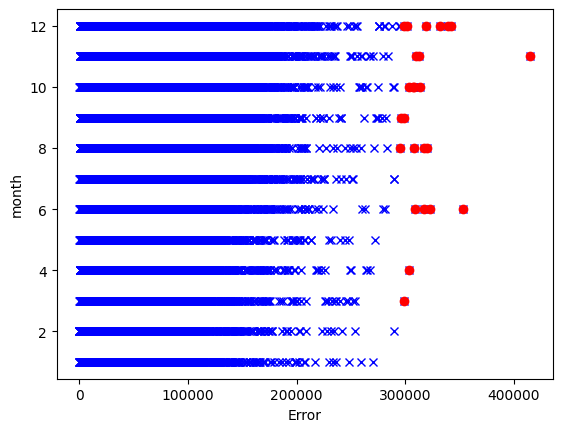

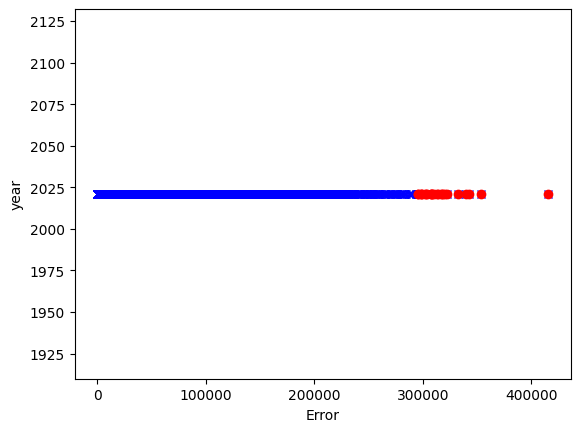

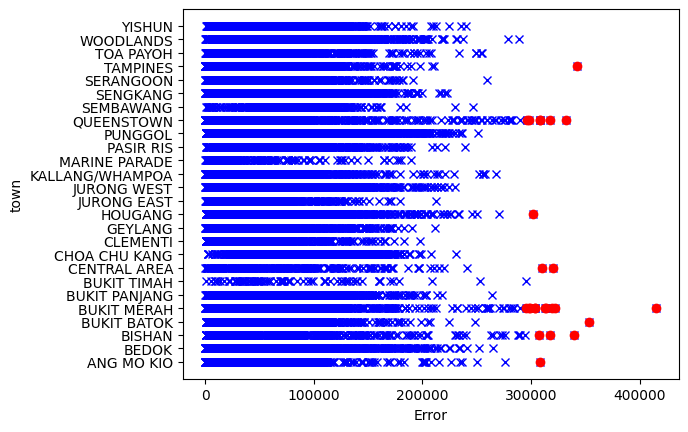

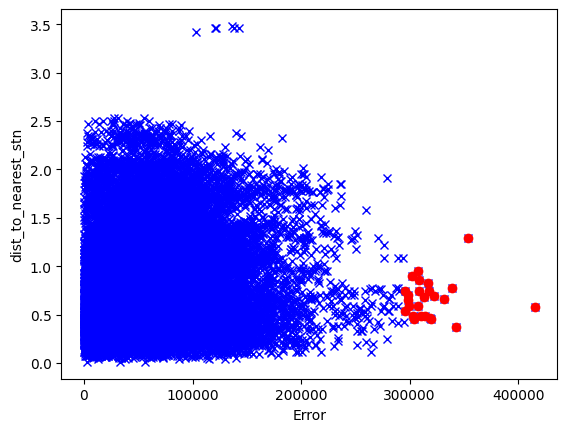

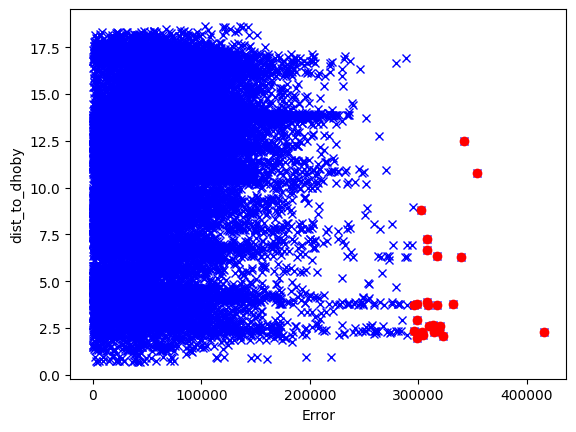

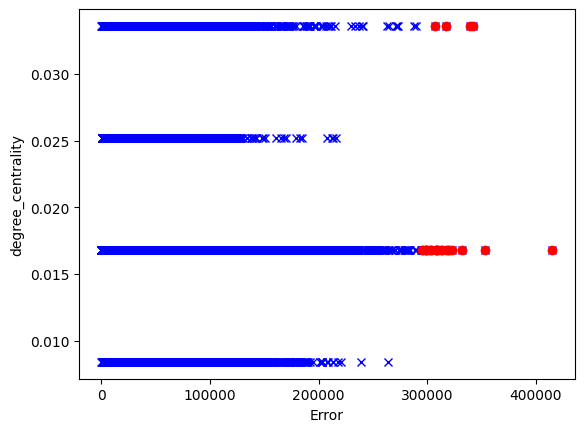

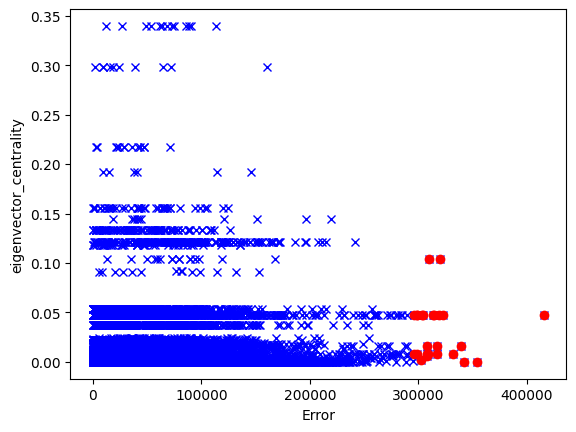

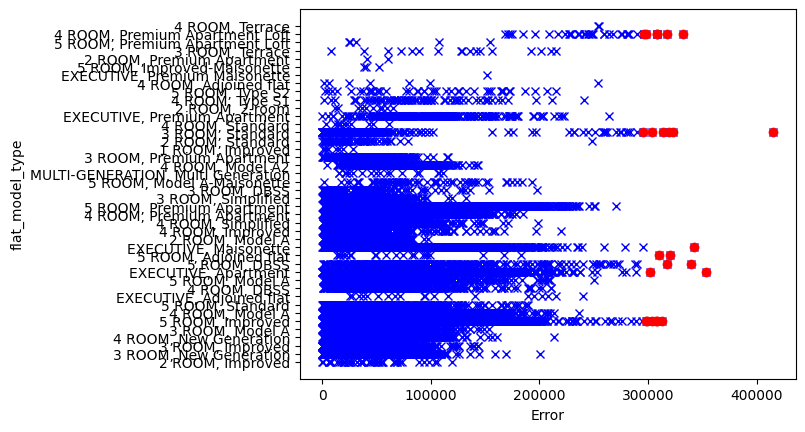

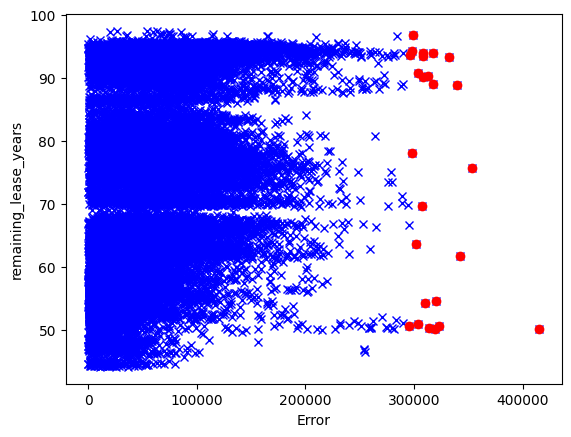

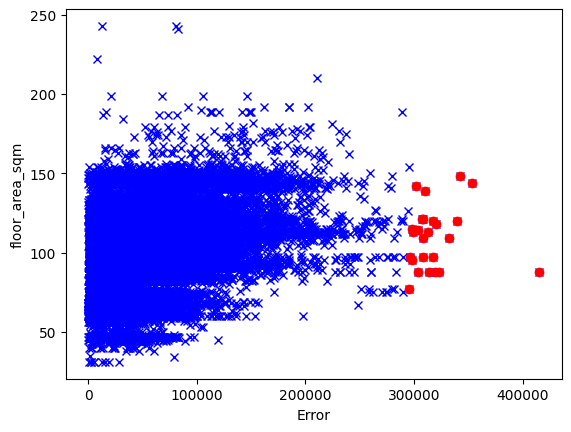

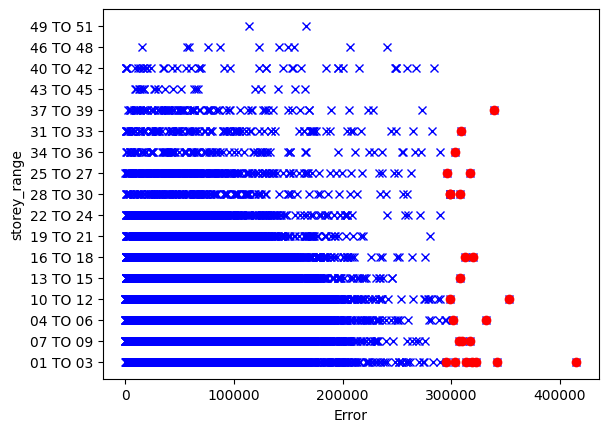

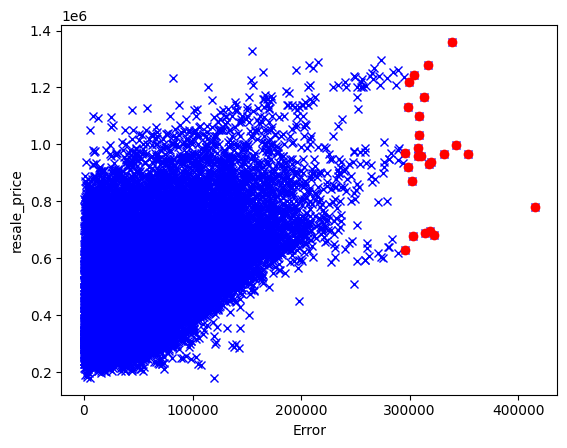

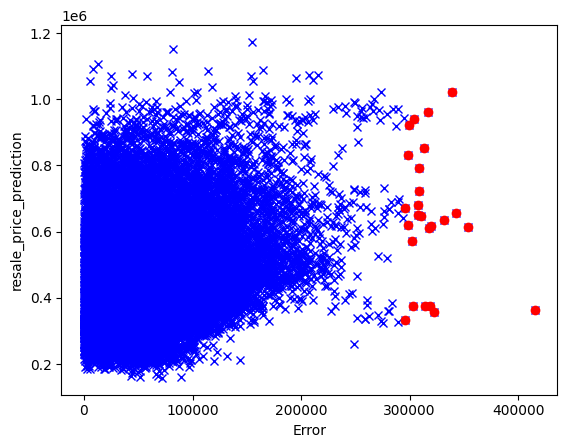

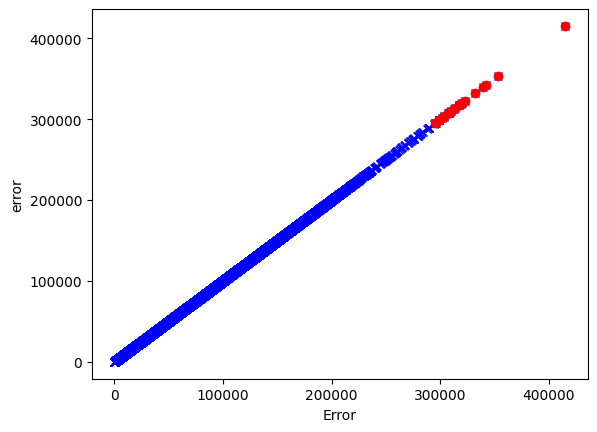

In [9]:
for col in bad_df.columns:
    # print(f"col: {col}")
    # col = sorted(col)
    fig, ax = plt.subplots()
    bad_df[col].sort_values(ignore_index=True)
    pred_df[col].sort_values(ignore_index=True)
    # ax.xaxis.set_major_formatter(FormatStrFormatter('%4.2f'))
    plt.plot(pred_df['error'], pred_df[col], 'bx', linestyle='None')
    plt.plot(bad_df['error'], bad_df[col], 'ro', linestyle='None')

    plt.xlabel('Error')
    plt.ylabel(col)
    # plt.title(col)
    plt.show()
    print("\n\n")

\# TODO: \<Enter your answer here\>

A trend i could notice is that majority of the highest errors are values in the higher density region.

For example, in the graphs for continuous values, such as dist_to_nearest_stn, the values are concentrated in the high density areas where there are similar values.

For the graphs plotting categorical data, the values do not seem equally distributed. For example, in storey_range, we can evidently see that the values with the highest errors are in the category where there are a lot more data points. In the columns with lower numbers, there are no data points that belong to the highest errors.

I believe that a way to improve this is to increase the number of data points in the dataset so that the categories are more balanced, as well as scale the continuous data columns so that the values are not so widely spread out.